In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report, 
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("bank-full.csv",delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df = df.drop('duration', axis=1)

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [5]:
df.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
campaign 48
pdays 559
previous 41
poutcome 4
y 2


Subscription Rate:
y
no     0.88
yes    0.12
Name: proportion, dtype: float64


C:\Users\r41ko\AppData\Local\Temp\ipykernel_24420\1548067426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


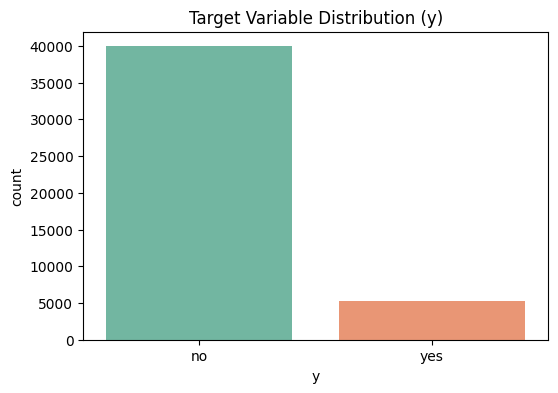

In [8]:
# Class distribution
subscription_rate = df['y'].value_counts(normalize=True).round(2)
print(f"Subscription Rate:\n{subscription_rate}")

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title("Target Variable Distribution (y)")
plt.show()

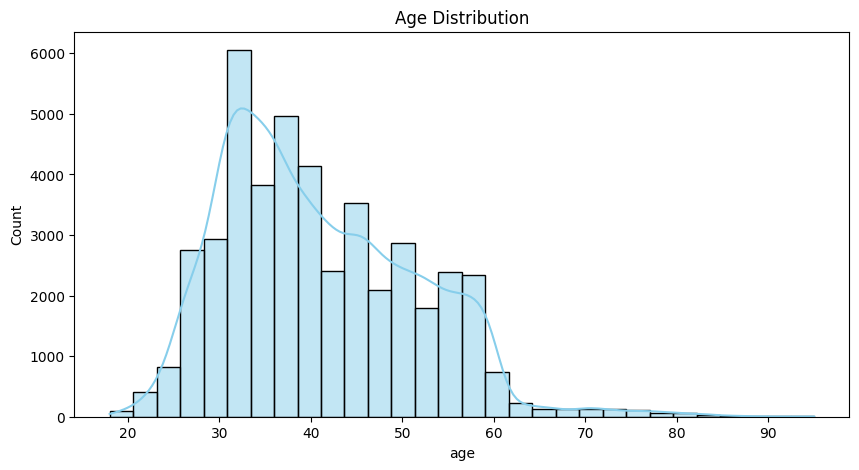

C:\Users\r41ko\AppData\Local\Temp\ipykernel_24420\2085550751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=df, palette='Set2')


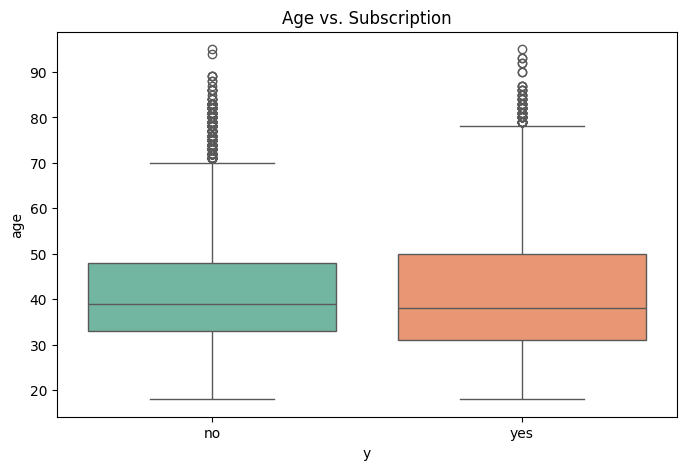

In [9]:
# Numerical Features Analysis 

plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

# Age vs. Subscription
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='age', data=df, palette='Set2')
plt.title("Age vs. Subscription")
plt.show()


C:\Users\r41ko\AppData\Local\Temp\ipykernel_24420\1380352757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='job', data=df, order=job_order, palette='viridis')


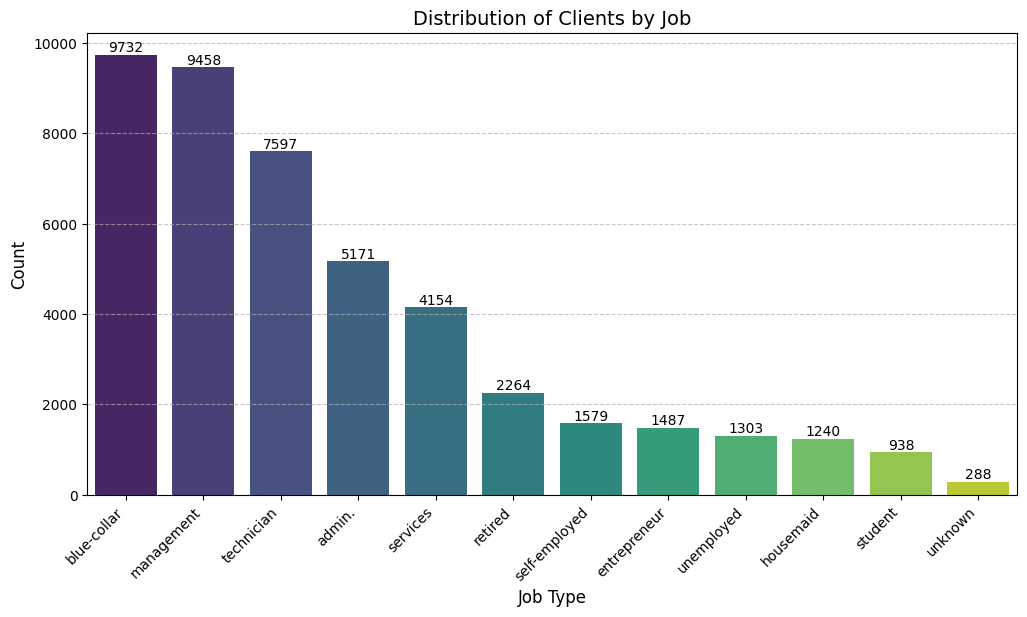

In [10]:
plt.figure(figsize=(12, 6))
job_order = df['job'].value_counts().index  # Order by frequency

# Plot count of clients per job
ax = sns.countplot(x='job', data=df, order=job_order, palette='viridis')
plt.title("Distribution of Clients by Job", fontsize=14)
plt.xlabel("Job Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

C:\Users\r41ko\AppData\Local\Temp\ipykernel_24420\4238452918.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column,
C:\Users\r41ko\AppData\Local\Temp\ipykernel_24420\4238452918.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column,
C:\Users\r41ko\AppData\Local\Temp\ipykernel_24420\4238452918.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column,
C:\Users\r41ko\AppData\Local\Temp\ipykernel_24420\4238452918.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

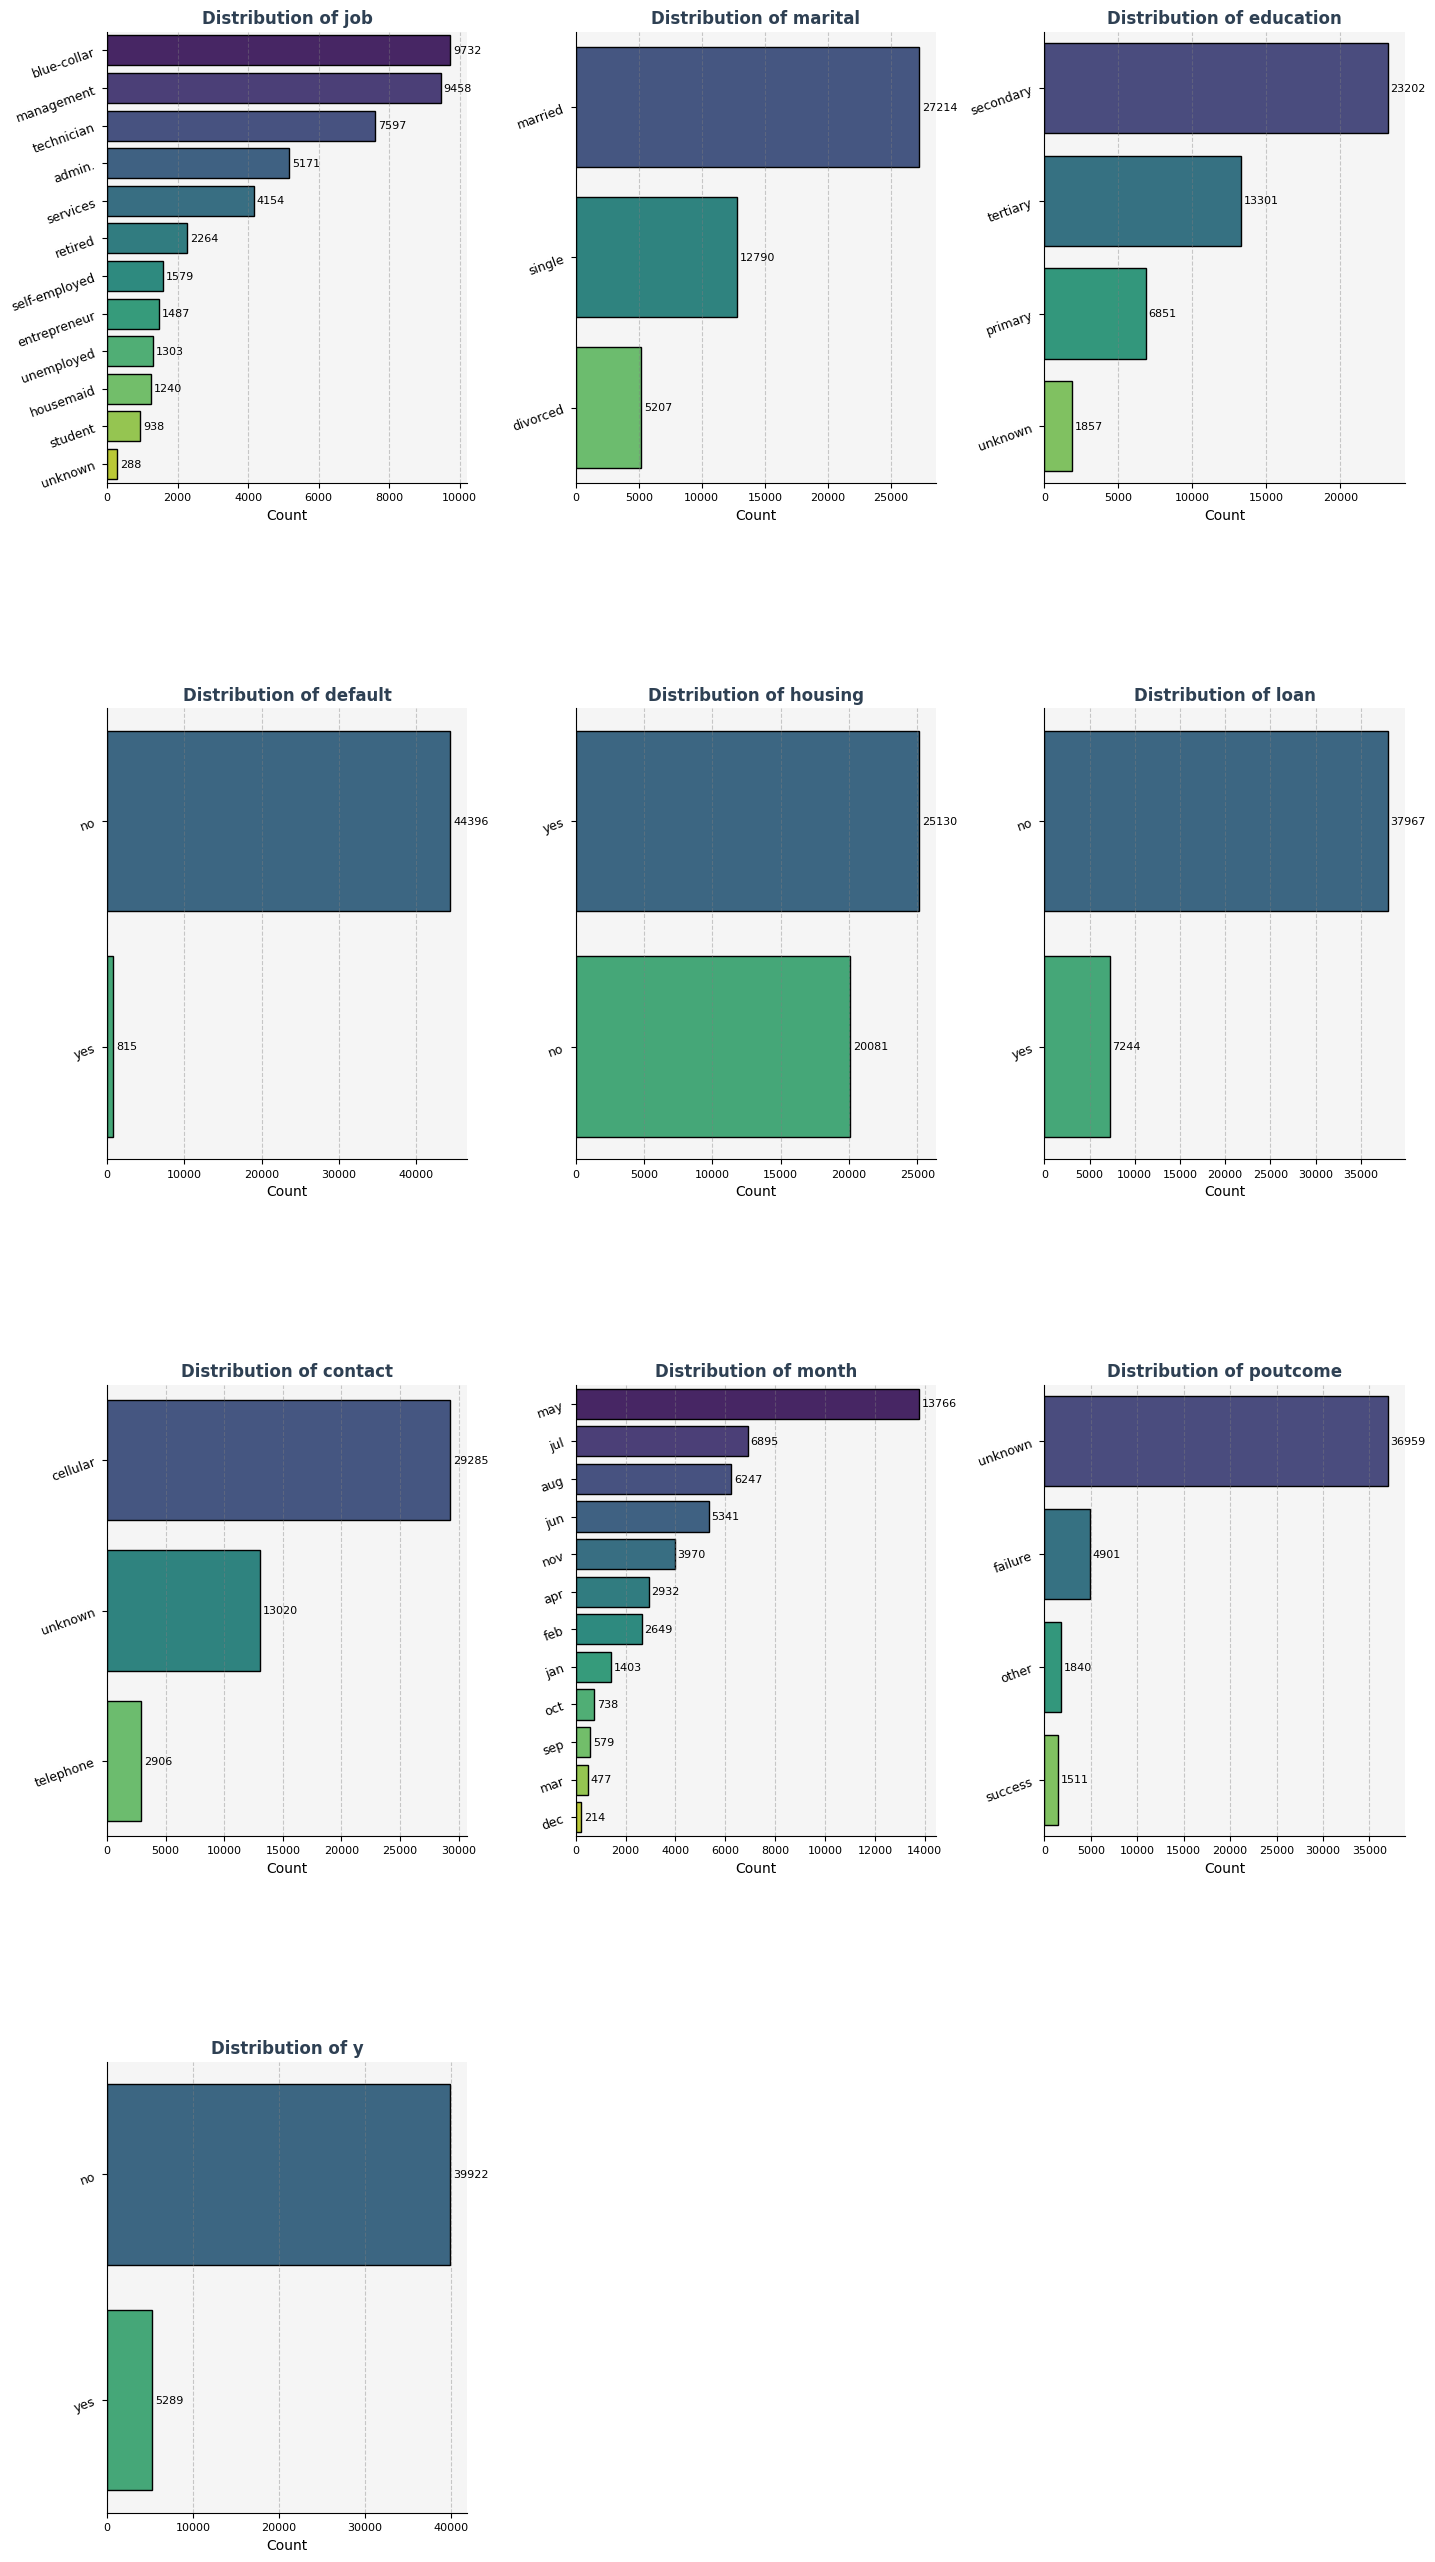

In [11]:
plt.figure(figsize=(15, 80), facecolor='white', dpi=100)
plotnumber = 1

# Create a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(df.columns))

for column in df.columns:
    if df[column].dtype == 'object':
        ax = plt.subplot(12, 3, plotnumber, facecolor='#f5f5f5')  # Light gray background for each plot
        
        # Create colorful countplot with enhancements
        sns.countplot(y=column, 
                     data=df, 
                     palette='viridis',  # Try 'Set2', 'tab20' or 'rocket' for different looks
                     edgecolor='black',  # Add black borders to bars
                     order=df[column].value_counts().index  # Sort by frequency
                     )
        
        # Add value labels
        for container in ax.containers:
            ax.bar_label(container, 
                        label_type='edge', 
                        padding=2, 
                        fontsize=8, 
                        color='black')
        
        # Styling
        plt.title(f'Distribution of {column}', 
                 fontsize=12, 
                 fontweight='bold', 
                 color='#2e4053')
        plt.xlabel('Count', fontsize=10)
        plt.ylabel('')
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=9, rotation=20)  # Rotate y-labels if needed
        
        # Remove spines and add grid
        ax.spines[['top', 'right']].set_visible(False)
        ax.grid(axis='x', 
               linestyle='--', 
               alpha=0.4, 
               color='gray')
        
        plotnumber += 1

plt.tight_layout(pad=3.0)  # Add space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing
plt.show()

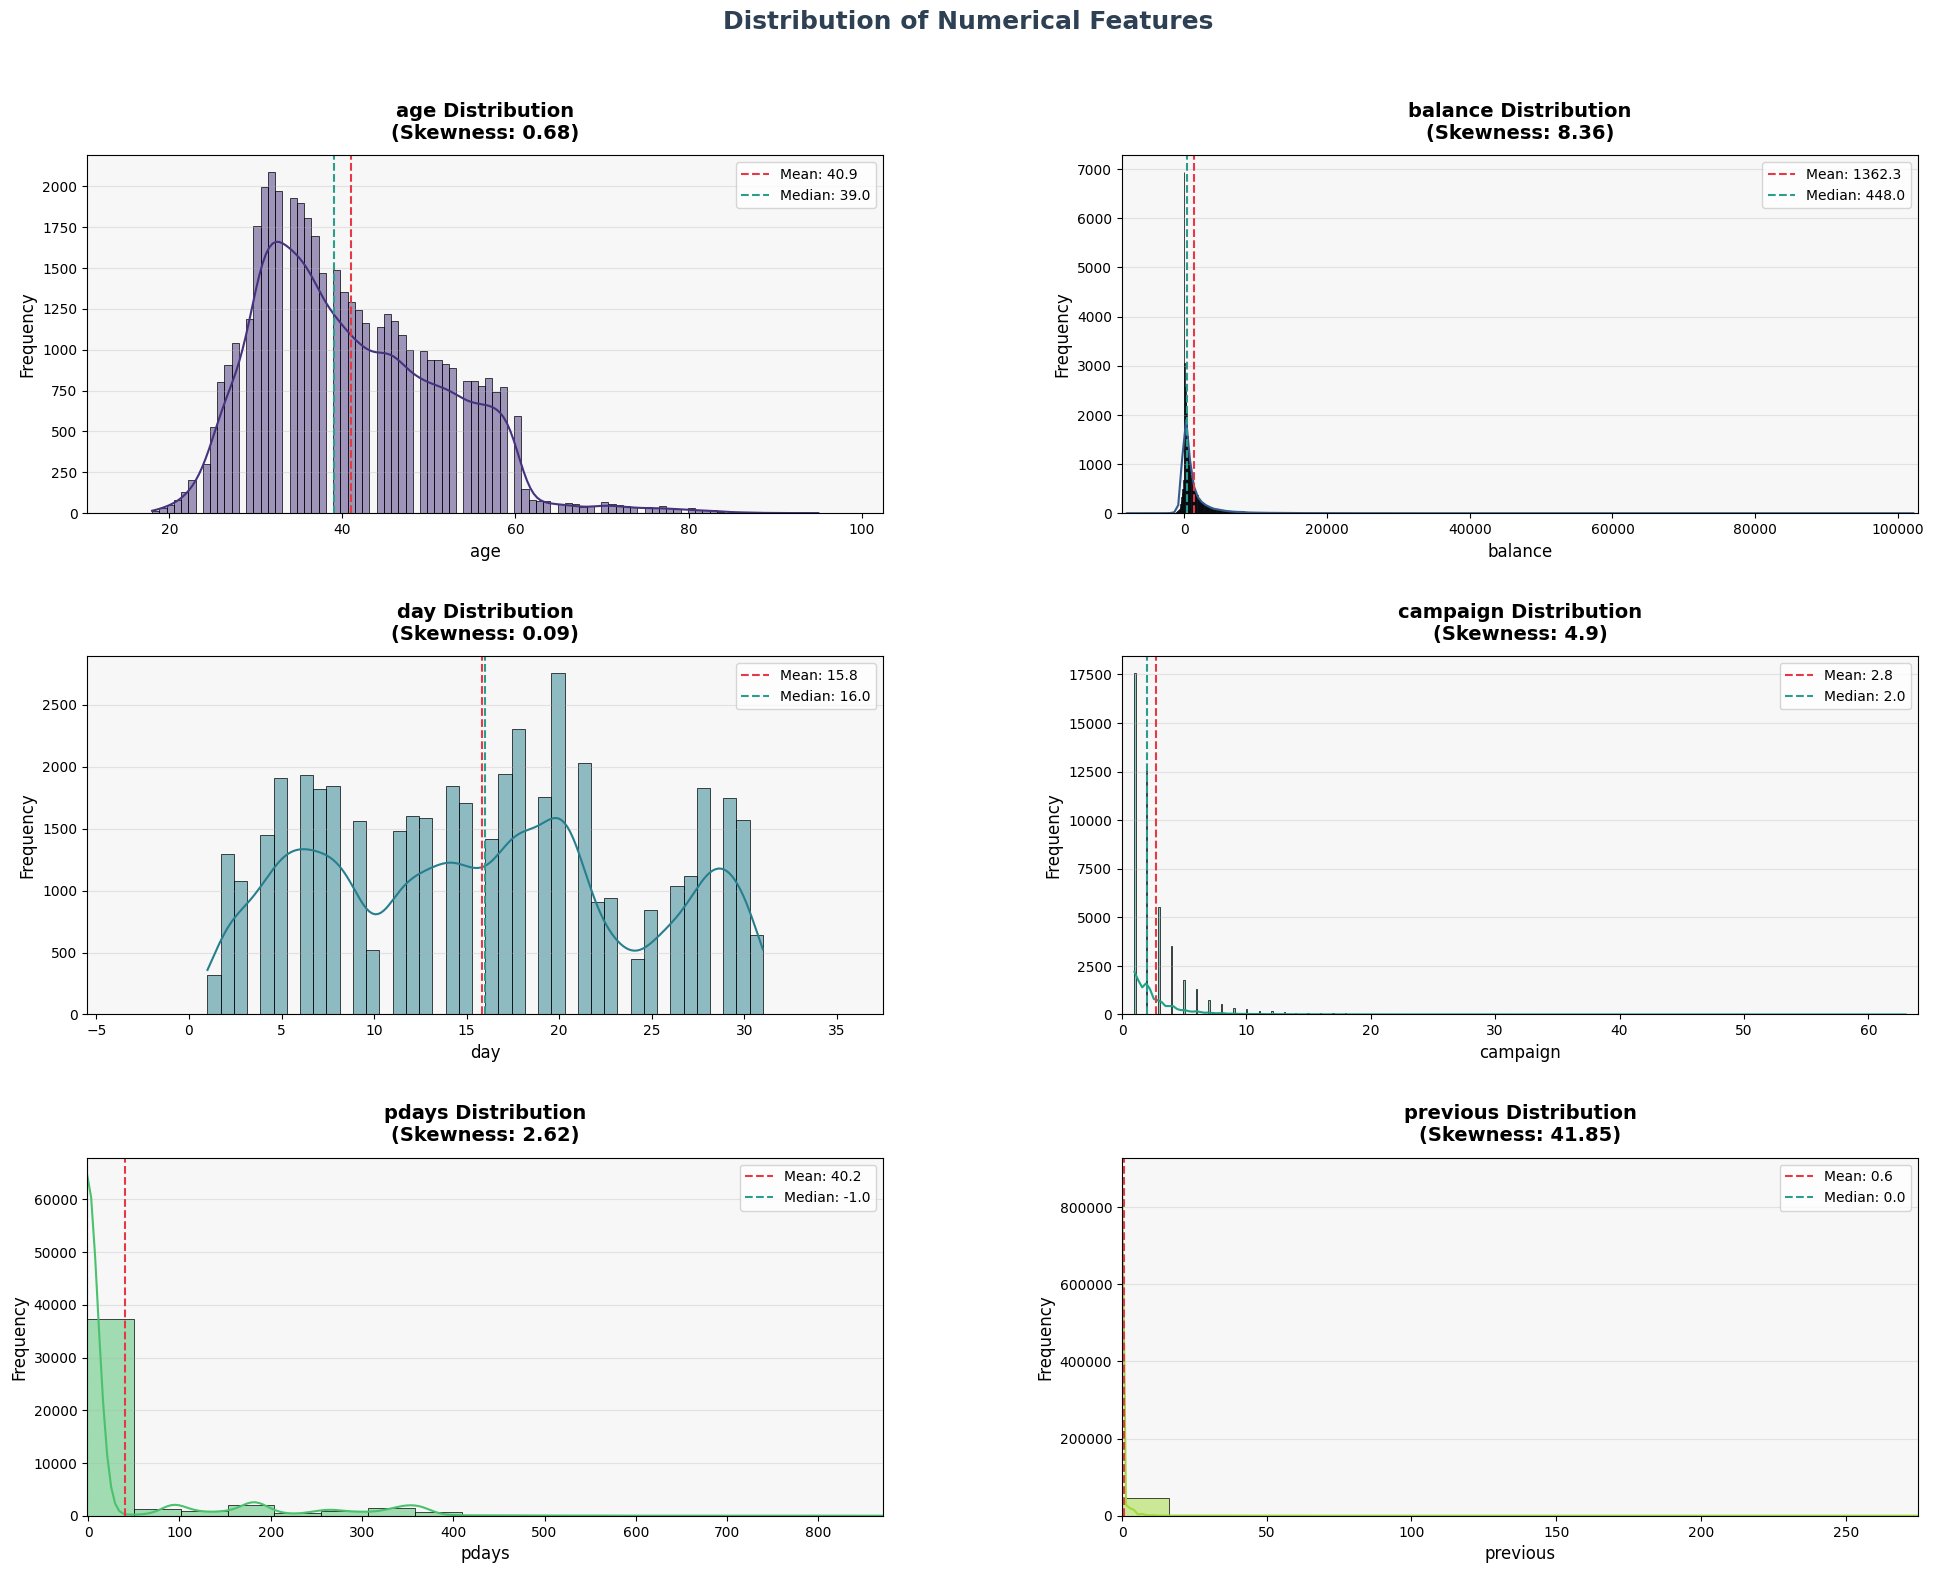

In [12]:
import numpy as np

plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

# Get numerical columns (modify as needed based on your actual numerical columns)
numerical_features = df.select_dtypes(include=np.number).columns

# Create custom color gradient
colors = sns.color_palette("viridis", n_colors=len(numerical_features))

for feature in numerical_features:
    ax = plt.subplot(5, 2, plotnumber, facecolor='#f7f7f7')
    
    # Create histogram with KDE
    sns.histplot(df[feature], 
                kde=True, 
                color=colors[plotnumber-1], 
                edgecolor='black', 
                linewidth=0.5,
                bins='auto')
    
    # Add annotations
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    skewness = df[feature].skew().round(2)
    
    plt.axvline(mean_val, color='#e63946', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='#2a9d8f', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.1f}')
    
    # Styling
    plt.title(f'{feature} Distribution\n(Skewness: {skewness})', 
            fontsize=14, 
            pad=12, 
            fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # Handle outliers by adjusting x-axis limits
    q1, q3 = df[feature].quantile([0.25, 0.75])
    iqr = q3 - q1
    plt.xlim(left=df[feature].min() - iqr*0.5, 
            right=df[feature].max() + iqr*0.5)
    
    # Format large numbers
    plt.ticklabel_format(style='plain', axis='x')
    
    plotnumber += 1

plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Distribution of Numerical Features', 
            y=1.02, 
            fontsize=18, 
            fontweight='bold', 
            color='#2e4053')
plt.show()

In [13]:
# Preprocessing setup
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})  # Binary encoding

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

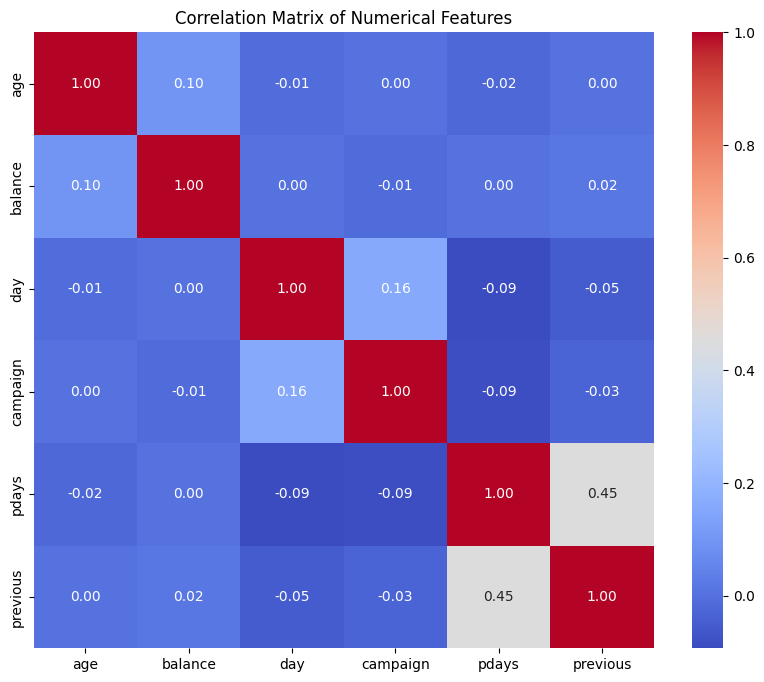

In [16]:

# Select numerical features only (correlation requires numeric data)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()  # No import needed!

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:

# Initialize models with class_weight='balanced' to handle imbalance
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(class_weight='balanced', probability=True),
    'KNN': KNeighborsClassifier()
}

# Dictionary to store results
results = []


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7985
           1       0.27      0.62      0.37      1058

    accuracy                           0.75      9043
   macro avg       0.60      0.70      0.61      9043
weighted avg       0.86      0.75      0.79      9043



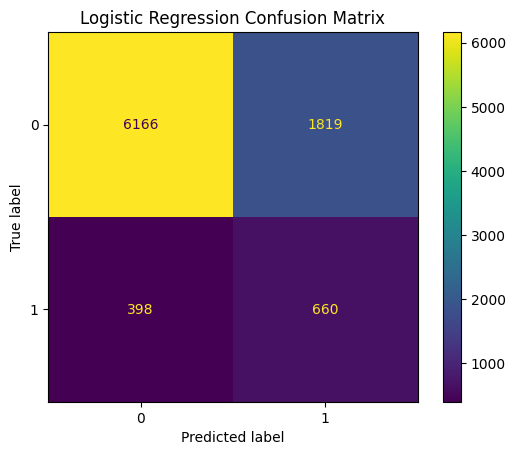


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7985
           1       0.31      0.31      0.31      1058

    accuracy                           0.84      9043
   macro avg       0.61      0.61      0.61      9043
weighted avg       0.84      0.84      0.84      9043



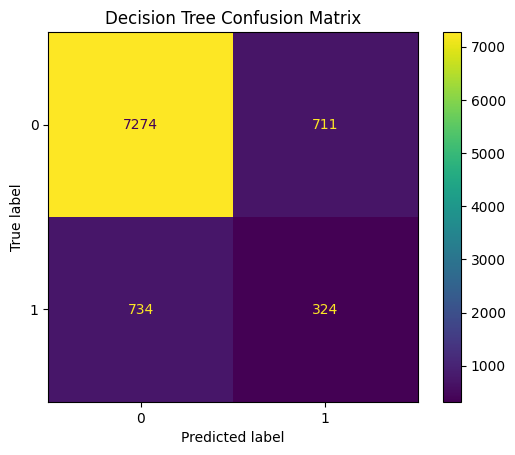


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.64      0.21      0.32      1058

    accuracy                           0.89      9043
   macro avg       0.77      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



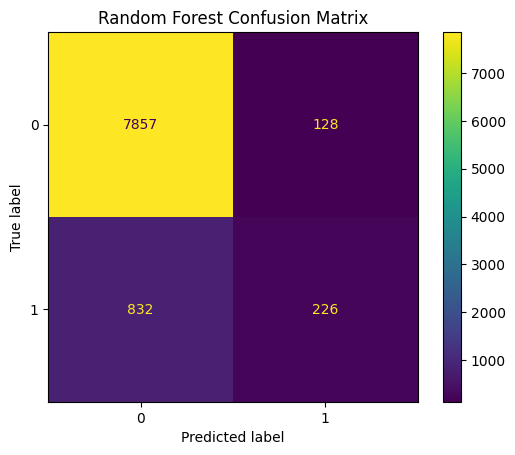


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.66      0.20      0.31      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



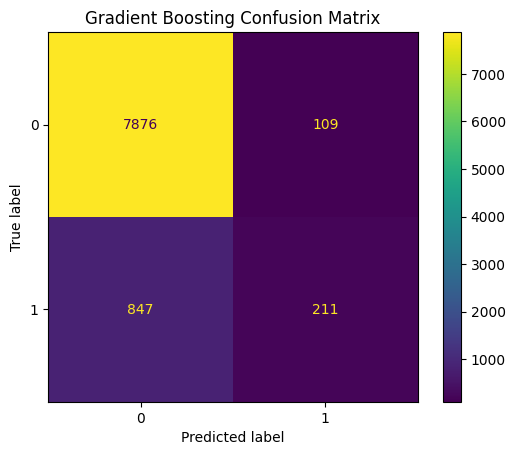


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7985
           1       0.38      0.60      0.46      1058

    accuracy                           0.84      9043
   macro avg       0.66      0.74      0.68      9043
weighted avg       0.88      0.84      0.85      9043



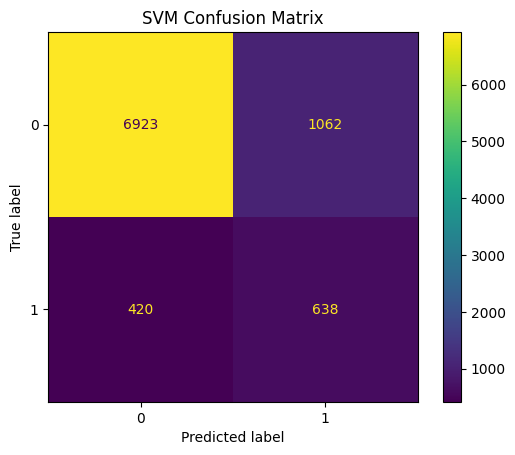


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.55      0.20      0.29      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



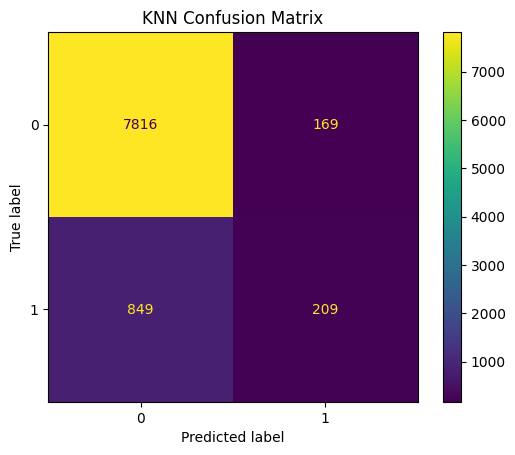

In [ ]:
# Train and evaluate models
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{name} Confusion Matrix')
    plt.show()


Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Model                                                                 
SVM                  0.836116   0.375294  0.603025  0.462654  0.791323
Logistic Regression  0.754838   0.266236  0.623819  0.373198  0.772238
Random Forest        0.893841   0.638418  0.213611  0.320113  0.790090
Decision Tree        0.840208   0.313043  0.306238  0.309603  0.608598
Gradient Boosting    0.894283   0.659375  0.199433  0.306241  0.802116
KNN                  0.887427   0.552910  0.197543  0.291086  0.702749


<Figure size 1000x800 with 0 Axes>

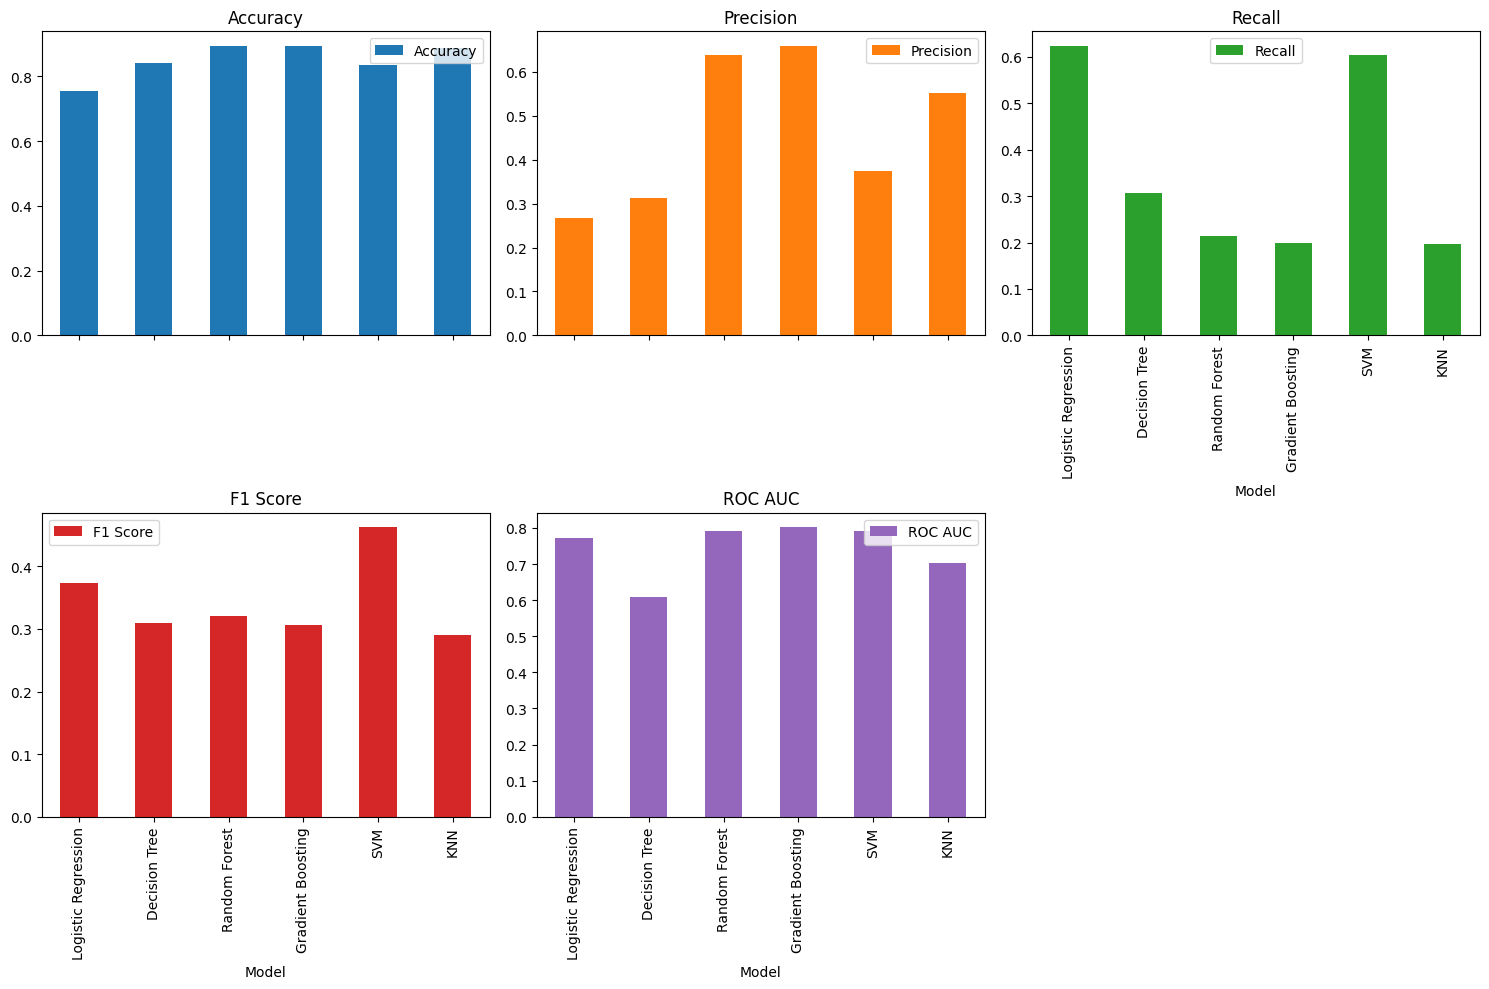

In [18]:

# Compare model performance
results_df = pd.DataFrame(results).set_index('Model')
print("\nModel Comparison:")
print(results_df.sort_values('F1 Score', ascending=False))

# Visual comparison
plt.figure(figsize=(10, 8))
results_df.plot(kind='bar', subplots=True, layout=(2, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()

Summary & Recommendations

Best Overall Model: Gradient Boosting — Strong in accuracy, precision, and ROC AUC. Ideal for balanced datasets where precision matters.

Best for Imbalanced Data: SVM — Highest recall and F1 score make it the top choice when identifying positive cases is crucial.

Best for Interpretability: Logistic Regression — Despite lower accuracy, its simplicity and high recall may be valuable for understanding key features.

Underperforming Model: KNN — Consistently low scores across metrics suggest it's less effective for this dataset.

✅ For Overall Performance → Gradient Boosting

Highest accuracy (0.894) and best ROC AUC (0.802)
Great for well-balanced datasets where both false positives and false negatives matter.
Use Case: General classification tasks (e.g., credit risk, customer churn prediction).